In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

In [5]:
%matplotlib inline 

In [7]:
df = pd.read_csv("House_Rent_Dataset.csv")


In [8]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [10]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [11]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [12]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [13]:
#Kategorik sütunları listele
categorical_columns = df.select_dtypes(include='object').columns
print("Kategorik Sütunlar:\n", categorical_columns) 

Kategorik Sütunlar:
 Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')


In [14]:
#sayısal sütunları listele
numerical_columns = df.select_dtypes(include=np.number).columns
print("Sayısal Sütunlar:\n", numerical_columns)

Sayısal Sütunlar:
 Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')


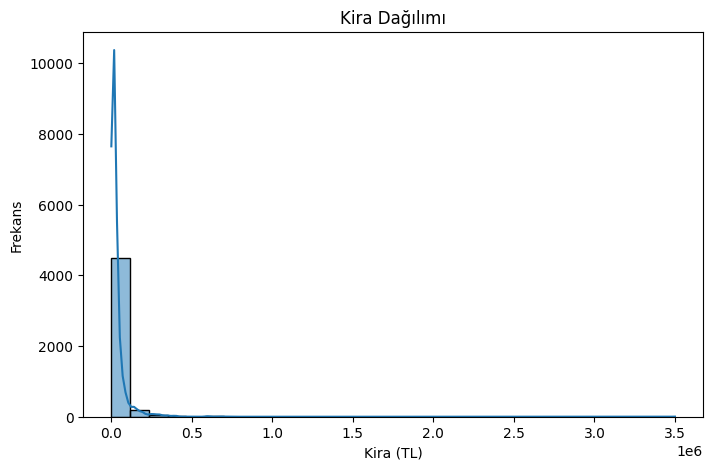

In [15]:
#kira dağılım grafiği
plt.figure(figsize=(8,5))
sns.histplot(df['Rent'], kde=True, bins=30)
plt.title('Kira Dağılımı')
plt.xlabel('Kira (TL)')
plt.ylabel('Frekans')
plt.show()

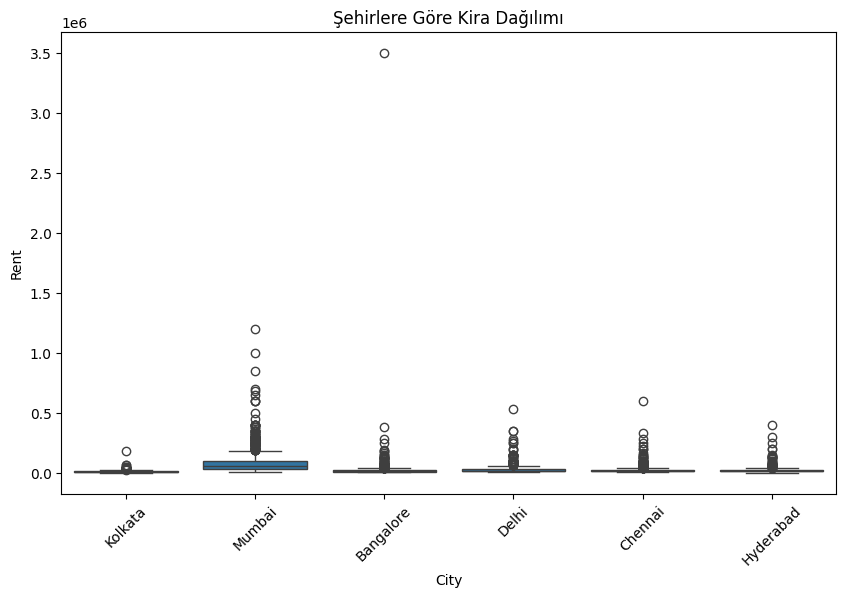

In [16]:
#şehirlere göre kira dağılımı
plt.figure(figsize=(10,6))
sns.boxplot(x='City', y='Rent', data=df)
plt.xticks(rotation=45)
plt.title('Şehirlere Göre Kira Dağılımı')
plt.show()

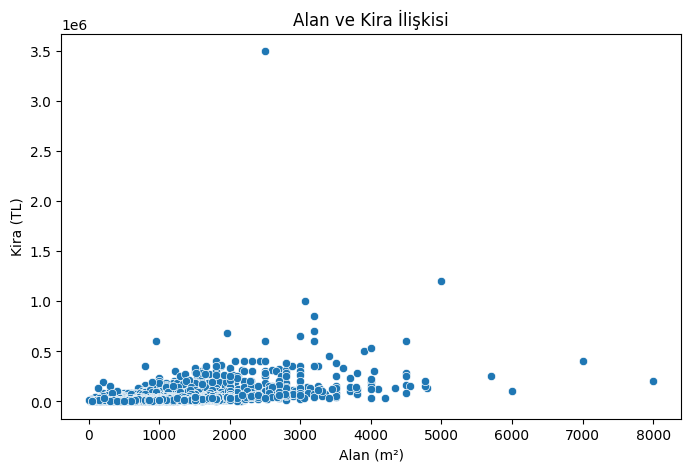

In [19]:
#alan kira ilişkisi
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Rent', data=df)
plt.title('Alan ve Kira İlişkisi')
plt.xlabel('Alan (m²)')    
plt.ylabel('Kira (TL)')
plt.show()


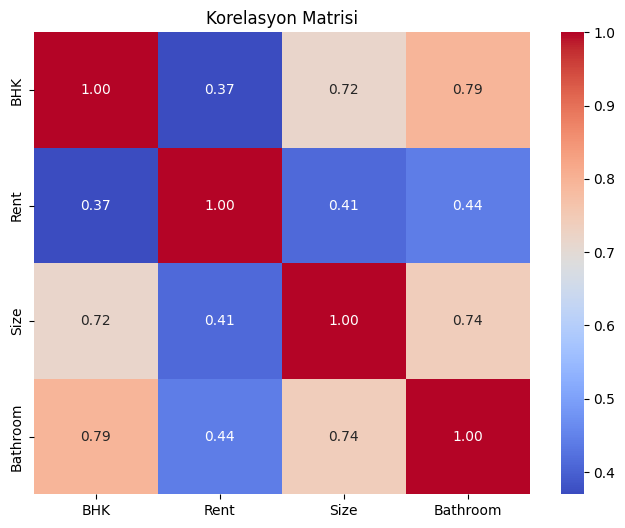

In [20]:
#korelasyon matrisi
plt.figure(figsize=(8,6))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

